# Treinando a perceptron

O treinamento de uma perceptron é feito atualizando os pesos.

Mas para atualizar os pesos é necessário "informar" o que é o erro.

Matematicamente:

$$
e = (y - y_{pred})
$$
$$
err = lr*e*X_i
$$
$$
W_i = W_i + err
$$

onde:
 - $lr$ é a taxa de aprendizado, ou Learning Rate
 - $e$ é o Erro da rede, normalmente o valor desejado menos o valor verdadeiro
 - $X_i$ é o valor de entrada associado ao peso $_i$
 - $W_i$ é o peso $_i$




#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#### Código

In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

### Labels

In [3]:
# Entrada labels
points = [[30.0,0],
          [25.0,5.0],
          [20.0,3.0],
          [15.0,8.0],
          [0.0,10.0],
          [6.0,7.0]]
valor = [[1],
         [1],
         [1],
         [0],
         [0],
         [0]]

#  add bias
for i in range(len(points)):
    points[i].append(1.0)
    
for x, y in zip(points,valor):
    print(x,y)

[30.0, 0, 1.0] [1]
[25.0, 5.0, 1.0] [1]
[20.0, 3.0, 1.0] [1]
[15.0, 8.0, 1.0] [0]
[0.0, 10.0, 1.0] [0]
[6.0, 7.0, 1.0] [0]


## Normalização

Normalmente se Normaliza os dados antes de passar para a rede.

Normalizar é basicamente colocar os valores entre 0 e 1.

Pois como os computadores trabalham com números discretos, a melhor faixa de números para se trabalhar esta entre o e 1.

A forma mais simples de se fazer é dividir os valores pelo maior valor...

Exemplo:

sendo X = [10, 3, 4, 8, 20]

X normalizado é [10/20, 3/20, 4/20, 8/20, 20/20]

Pois desta forma, o maior valor é 1.

Lembrando que os valores tem que ser ponto flutuante.



In [4]:
points = np.array(points)
# print(np.array(points).shape)
# print(points[0][:])
points[:,0] *= 1/30
points[:,1] *= 1/10

for x, y in zip(points,valor):
    print(x,y)

[1. 0. 1.] [1]
[0.83333333 0.5        1.        ] [1]
[0.66666667 0.3        1.        ] [1]
[0.5 0.8 1. ] [0]
[0. 1. 1.] [0]
[0.2 0.7 1. ] [0]


# pesos

In [5]:
# Criando os pesos da perceptron
W = []
N_entrada = 3

for i in range(N_entrada):
    W.append(random.random()*2 -1)


In [6]:
W

[-0.6070788254534569, 0.08817247957868424, -0.6313702789172153]

# predição

In [7]:
def predict(X):
    return sigmoid(sum([w*x for w,x in zip(W, X)])) 

### Testando

In [8]:
for X in points:
    p = predict(X)
    print(p)

0.2247060569294083
0.25101936139419706
0.2670507492593607
0.29642678053011284
0.3674440066948777
0.33379613202683134


### Função de treinamento

In [9]:
lr = 0.5

def treinaPerceptron(points, valor):
    for x_train, y_train in zip(points, valor):
        e = y_train[0] - predict(x_train)
        
        for i in range(len(W)):
            W[i] += lr*e*x_train[i]

### Função de visualização 2D

In [10]:
def visualiza(zero1=False):
    img = np.ones((300, 400)) 
    # grab the image dimensions
    w = img.shape[0]
    h = img.shape[1]

    if zero1:
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
                if (predict([x/w, y/h, 1]) > 0.5):
                    img[x][y] = 1
                else:
                    img[x][y] = 0 
    else:
        # loop over the image, pixel by pixel
        for x in range(0, w):
            for y in range(0, h):
                # threshold the pixel
                img[x][y] = predict([x/w, y/h, 1])
    
    plt.imshow(img, origin='lower')
    plt.colorbar()
    for x, y in zip(points,valor):
        if y[0] == 1:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='r', s=40)
        else:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='b', s=40)
    plt.show()

## Testando a visualização

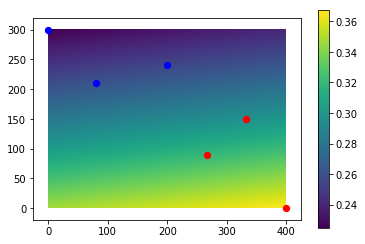

In [11]:
visualiza(False)

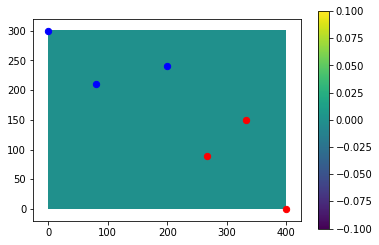

In [12]:
visualiza(True)

## Observando o treinamento

Observe como a rede "Aprende a separar os pontos azuis dos vermelhos"

In [13]:
epoch = 0

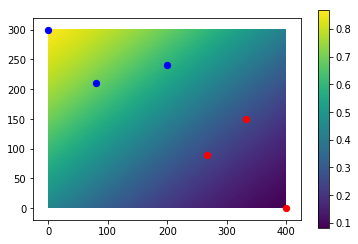

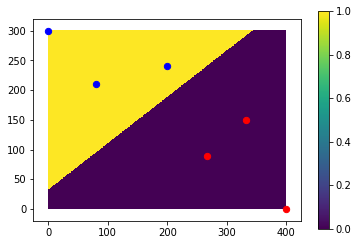

Epocas:  8  |  [2.114686804285525, -2.1907223391796284, -0.22657164103141686]


In [22]:
treinaPerceptron(points, valor)
visualiza(False)
visualiza(True)
epoch += 1
print("Epocas: ",epoch," | ",W)

In [15]:
W

[-0.0190982084714557, -0.34263326069580824, -0.4876371797140786]